<a href="https://colab.research.google.com/github/nithin521/Anime-First-Project-On-HTML/blob/main/character_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install labelImg


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.7/247.7 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 32.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 MB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 276.4/276.4 kB 12.9 MB/s eta 0:00:00
  Created wheel for labelImg: filename=labelImg-1.8.6-py2.py3-none-any.whl size=261520 sha256=c8211bb8377521423daaa50f6730df51ed6b08bda2d68adb5524d8f62f398cf3
  Stored in directory: /root/.cache/pip/wheels/79/90/db/e0700438d3647c0209061d77992c901d3c786a56fec574ac86
Successfully built labelImg


In [1]:
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.8/949.8 kB 36.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 108.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 33.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 92.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [31]:
import os
import shutil
import random

# Set your source folders
images_folder = '/content/drive/MyDrive/characters/images'
labels_folder = '/content/drive/MyDrive/characters/labels'

# Destination folders
train_images_folder = '/content/drive/MyDrive/characters/images/train'
val_images_folder = '/content/drive/MyDrive/characters/images/val'
train_labels_folder = '/content/drive/MyDrive/characters/labels/train'
val_labels_folder = '/content/drive/MyDrive/characters/labels/val'

# Create folders if they don't exist
os.makedirs(train_images_folder, exist_ok=True)
os.makedirs(val_images_folder, exist_ok=True)
os.makedirs(train_labels_folder, exist_ok=True)
os.makedirs(val_labels_folder, exist_ok=True)

# Get all image filenames
image_files = [f for f in os.listdir(images_folder) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Shuffle images for randomness
random.shuffle(image_files)

# Split ratio (e.g., 80% training, 20% validation)
split_ratio = 0.8
split_index = int(len(image_files) * split_ratio)

train_files = image_files[:split_index]
val_files = image_files[split_index:]

# Function to move images and labels
def move_files(file_list, dest_image_folder, dest_label_folder):
    for file in file_list:
        image_path = os.path.join(images_folder, file)
        label_path = os.path.join(labels_folder, file.replace('.jpg', '.txt').replace('.png', '.txt').replace('.jpeg', '.txt'))

        shutil.move(image_path, os.path.join(dest_image_folder, file))
        if os.path.exists(label_path):
            shutil.move(label_path, os.path.join(dest_label_folder, os.path.basename(label_path)))

# Move training files
move_files(train_files, train_images_folder, train_labels_folder)

# Move validation files
move_files(val_files, val_images_folder, val_labels_folder)

print(f"Dataset split completed! {len(train_files)} training images, {len(val_files)} validation images.")


Dataset split completed! 84 training images, 22 validation images.


In [2]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# hyp_yaml = """
# lr0: 0.01
# lrf: 0.2
# momentum: 0.937
# weight_decay: 0.0005
# warmup_epochs: 3.0
# warmup_momentum: 0.8
# box: 0.1
# cls: 0.1
# dfl: 1.5
# mosaic: 1.0
# mixup: 0.1
# fliplr: 0.5
# copy_paste: 0.05
# """

# with open("hyp.yaml", "w") as f:
#     f.write(hyp_yaml)

# Train by passing overrides for hyp file:
model = YOLO('yolov8l.pt')
model.train(
    data='/content/drive/MyDrive/characters/data.yaml',
    epochs=100,
    imgsz=768,
    batch=4,
    patience=25,
    # cfg='hyp.yaml'  # This will load the hyperparameters from the file
)

Ultralytics 8.3.94 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/content/drive/MyDrive/characters/data.yaml, epochs=100, time=None, patience=25, batch=4, imgsz=768, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf

train: Scanning /content/drive/MyDrive/characters/labels/train... 83 images, 1 backgrounds, 0 corrupt: 100%|██████████| 84/84 [00:01<00:00, 46.82it/s]


train: New cache created: /content/drive/MyDrive/characters/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/characters/labels/val... 22 images, 0 backgrounds, 0 corrupt: 100%|██████████| 22/22 [00:14<00:00,  1.55it/s]

val: New cache created: /content/drive/MyDrive/characters/labels/val.cache


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 768 train, 768 val
Using 2 dataloader workers
Logging results to runs/detect/train4
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      10.3G      1.675      7.088      1.835         26        768: 100%|██████████| 21/21 [00:08<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.11it/s]

                   all         22        130       0.17      0.746      0.175     0.0947



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      10.3G      2.184       6.48      2.302         29        768: 100%|██████████| 21/21 [00:06<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.68it/s]

                   all         22        130    0.00136     0.0692   0.000729   0.000289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      10.3G      2.366      3.282       2.47         33        768: 100%|██████████| 21/21 [00:06<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.30it/s]

                   all         22        130          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      10.3G      2.601      3.331      2.656         39        768: 100%|██████████| 21/21 [00:06<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.24it/s]

                   all         22        130          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      10.3G      2.659       4.49       2.74         48        768: 100%|██████████| 21/21 [00:06<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.41it/s]

                   all         22        130          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      10.3G      2.807       3.23      2.889         24        768: 100%|██████████| 21/21 [00:06<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.06it/s]

                   all         22        130          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      10.3G      2.619      3.225      2.787         35        768: 100%|██████████| 21/21 [00:06<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.33it/s]

                   all         22        130          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      10.3G       2.39      3.166      2.567         33        768: 100%|██████████| 21/21 [00:06<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.26it/s]

                   all         22        130          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      10.3G      2.344      3.061      2.573         69        768: 100%|██████████| 21/21 [00:06<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.64it/s]

                   all         22        130    0.00577     0.0308    0.00347    0.00124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      10.3G      2.355      2.982      2.516         56        768: 100%|██████████| 21/21 [00:06<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.82it/s]

                   all         22        130    0.00144     0.0692   0.000767   0.000135



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      10.3G      2.173      2.954      2.384         57        768: 100%|██████████| 21/21 [00:06<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.87it/s]

                   all         22        130    0.00197        0.1    0.00109    0.00032



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      10.4G      2.103      2.835      2.376         39        768: 100%|██████████| 21/21 [00:06<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.74it/s]

                   all         22        130    0.00409      0.192    0.00245   0.000689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      10.4G      2.139       2.82      2.348         46        768: 100%|██████████| 21/21 [00:06<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.23it/s]

                   all         22        130    0.00455      0.231    0.00281   0.000954



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      10.5G      2.053      2.717      2.298         48        768: 100%|██████████| 21/21 [00:06<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.52it/s]

                   all         22        130     0.0202      0.308     0.0129    0.00432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      10.5G      2.034      2.669      2.299         40        768: 100%|██████████| 21/21 [00:06<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.42it/s]

                   all         22        130     0.0953      0.231     0.0592     0.0195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      10.6G      1.989      2.637      2.272         52        768: 100%|██████████| 21/21 [00:06<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.50it/s]

                   all         22        130     0.0912      0.292     0.0589     0.0191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      10.6G      2.045      2.644      2.275         42        768: 100%|██████████| 21/21 [00:06<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.32it/s]

                   all         22        130      0.138      0.254     0.0778      0.028



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      10.7G      2.005      2.505      2.241         30        768: 100%|██████████| 21/21 [00:06<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.87it/s]

                   all         22        130      0.233      0.315       0.17     0.0635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      10.7G      1.984      2.487      2.221         28        768: 100%|██████████| 21/21 [00:06<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.56it/s]

                   all         22        130      0.319      0.292      0.209     0.0853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      10.7G      1.942      2.467      2.179         21        768: 100%|██████████| 21/21 [00:06<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.44it/s]

                   all         22        130      0.304      0.308      0.198     0.0673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      10.8G      1.929      2.441      2.165         72        768: 100%|██████████| 21/21 [00:06<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.14it/s]

                   all         22        130     0.0779      0.308     0.0485     0.0171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      10.8G      1.899      2.378      2.125         38        768: 100%|██████████| 21/21 [00:06<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.85it/s]

                   all         22        130      0.113      0.154     0.0505      0.015



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      10.9G      1.916      2.296       2.13         39        768: 100%|██████████| 21/21 [00:06<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.77it/s]

                   all         22        130      0.175      0.292      0.117      0.046



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      10.9G      1.897      2.381      2.137         48        768: 100%|██████████| 21/21 [00:06<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.71it/s]

                   all         22        130      0.169      0.338       0.11     0.0475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100        11G      1.828      2.301       2.08         29        768: 100%|██████████| 21/21 [00:06<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.62it/s]

                   all         22        130       0.19      0.308      0.115      0.048



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      11.2G      1.882      2.296      2.154         45        768: 100%|██████████| 21/21 [00:06<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.50it/s]

                   all         22        130      0.288      0.362      0.237      0.104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      11.5G      1.798      2.217      2.055         47        768: 100%|██████████| 21/21 [00:06<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.31it/s]

                   all         22        130      0.229      0.377       0.21     0.0874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      11.7G      1.864      2.279       2.12         31        768: 100%|██████████| 21/21 [00:06<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.65it/s]

                   all         22        130      0.169      0.246      0.134     0.0559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100        12G      1.788      2.253      2.051         49        768: 100%|██████████| 21/21 [00:06<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.60it/s]

                   all         22        130       0.19      0.192      0.129     0.0484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      12.2G      1.778      2.231      2.059         29        768: 100%|██████████| 21/21 [00:06<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.17it/s]

                   all         22        130      0.273        0.4      0.215     0.0878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      12.5G      1.714      2.139       1.97         43        768: 100%|██████████| 21/21 [00:06<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.28it/s]

                   all         22        130      0.337      0.372      0.298      0.134



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      12.7G      1.776      2.166      1.997         35        768: 100%|██████████| 21/21 [00:06<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.19it/s]

                   all         22        130      0.315      0.377       0.26      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      13.1G      1.739      2.105      1.959         57        768: 100%|██████████| 21/21 [00:06<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.50it/s]

                   all         22        130      0.363        0.4      0.286      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      5.65G      1.733      2.146      1.985         36        768: 100%|██████████| 21/21 [00:06<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.50it/s]

                   all         22        130      0.459      0.377      0.366      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      5.65G      1.659      2.013      1.869         48        768:  71%|███████▏  | 15/21 [00:04<00:01,  3.02it/s]

In [36]:
from PIL import Image
import os

folder_path = '/content/drive/MyDrive/characters/images/train'
corrupt_images = []
count=0
for filename in os.listdir(folder_path):
    count+=1
    if filename.endswith(('.jpg', '.jpeg', '.png')):
        file_path = os.path.join(folder_path, filename)
        try:
            img = Image.open(file_path)
            img.verify()  # Verify if corrupted
        except (IOError, SyntaxError) as e:
            corrupt_images.append(filename)
print(count)
print(f"Corrupt images: {corrupt_images}")


84
Corrupt images: []


In [39]:
#convert class labels 1-> 0
import glob

label_files = glob.glob('/content/drive/MyDrive/characters/labels/train/*.txt')

for file in label_files:
    with open(file, 'r') as f:
        lines = f.readlines()
    new_lines = []
    for line in lines:
        # Replace the first character if it's '1' with '0'
        if line.startswith('1 '):
            line = '0' + line[1:]
        new_lines.append(line)
    with open(file, 'w') as f:
        f.writelines(new_lines)

print("All class labels starting with '1' have been replaced with '0'.")


All class labels starting with '1' have been replaced with '0'.



image 1/1 /content/drive/MyDrive/Koe no Katachi/Chapter 20 [en-data] Reason - c5d19455/0018.png: 768x544 5 characters, 72.2ms
Speed: 3.9ms preprocess, 72.2ms inference, 1.3ms postprocess per image at shape (1, 3, 768, 544)


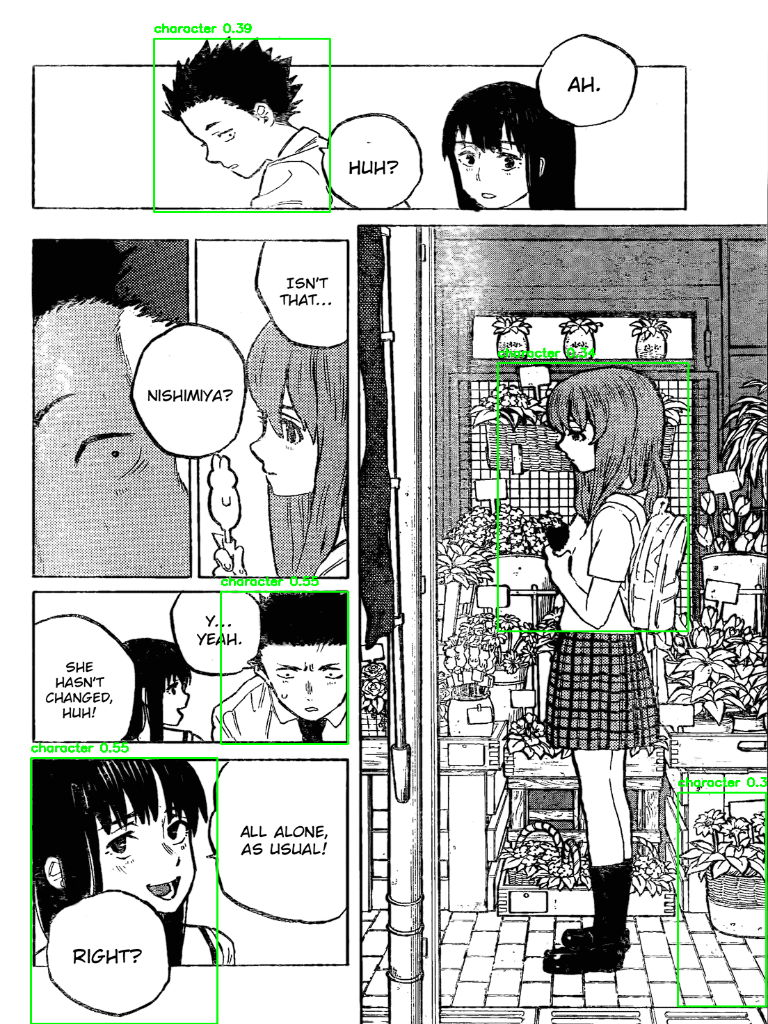

In [30]:
from google.colab.patches import cv2_imshow
import cv2

# model = YOLO('/content/runs/detect/train2/weights/best.pt')
# model = YOLO('/content/drive/MyDrive/characters/models/59.pt')
model = YOLO('best (3).pt')
image_path = "/content/drive/MyDrive/Koe no Katachi/Chapter 20 [en-data] Reason - c5d19455/0018.png"

# Perform prediction
# Add this after prediction
results = model.predict(source=image_path, imgsz=768, save=False, iou=0.6,conf=0.3)


# Extract boxes and plot them using OpenCV
result = results[0]
boxes = result.boxes.xyxy.cpu().numpy()  # bounding boxes (x1, y1, x2, y2)
confidences = result.boxes.conf.cpu().numpy()  # confidence scores
classes = result.boxes.cls.cpu().numpy()  # class indices
names = model.names  # class names

# Read image
img = cv2.imread(image_path)

# Draw boxes
for box, cls_id, conf in zip(boxes, classes, confidences):
    x1, y1, x2, y2 = box.astype(int)
    label = f"{names[int(cls_id)]} {conf:.2f}"
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

# Display image in notebook or if using local environment:
img_resized = cv2.resize(img, (768, 1024))
cv2_imshow( img_resized)


# In Colab use:
# from google.colab.patches import cv2_imshow
# cv2_imshow(img)


In [ ]:
import os

labels_folder = '/content/drive/MyDrive/characters/labels/val'  # Change if needed

def round_labels(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    new_lines = []
    for line in lines:
        parts = line.strip().split()
        if len(parts) == 5:
            class_id = parts[0]
            # Round each float to 6 decimal places
            values = [str(round(float(x), 6)) for x in parts[1:]]
            new_line = ' '.join([class_id] + values)
            new_lines.append(new_line)

    with open(file_path, 'w') as file:
        file.write('\n'.join(new_lines) + '\n')

# Loop through all .txt files and round values
for root, _, files in os.walk(labels_folder):
    for f in files:
        if f.endswith('.txt'):
            file_path = os.path.join(root, f)
            round_labels(file_path)

print("Label rounding completed.")


Label rounding completed.


In [ ]:
# """Convert dataset from PASCAL VOC XML format to YOLO format."""

# import argparse
# import os
# import xml.etree.ElementTree as ET


# def convert_bbox_to_yolo(
#     size: tuple[float, float], box: tuple[float, float, float, float]
# ) -> tuple[float, float, float, float]:
#     """Convert bounding box from absolute coordinates to relative coordinates.

#     :param size: Tuple of (width, height) of the image.
#     :param box: Tuple of (xmin, ymin, xmax, ymax) for the bounding box.
#     :return: Tuple of (x_center, y_center, width, height) in relative
#         coordinates.
#     """
#     scale_width = 1.0 / size[0]
#     scale_height = 1.0 / size[1]

#     center_x = (box[0] + box[2]) / 2.0
#     center_y = (box[1] + box[3]) / 2.0
#     box_width = box[2] - box[0]
#     box_height = box[3] - box[1]

#     rel_center_x = center_x * scale_width
#     rel_center_y = center_y * scale_height
#     rel_width = box_width * scale_width
#     rel_height = box_height * scale_height

#     return (rel_center_x, rel_center_y, rel_width, rel_height)


# def xml_to_txt(input_xml: str, output_txt: str, class_mapping: dict[str, int]):
#     """Parse an XML file and write to a .txt file in YOLO format.

#     :param input_xml: Path to the input XML file.
#     :param output_txt: Path to the output .txt file.
#     :param class_mapping: Dictionary mapping class names to class.
#     """
#     tree = ET.parse(input_xml)
#     root = tree.getroot()
#     width = int(root.find(".//size/width").text)
#     height = int(root.find(".//size/height").text)

#     with open(output_txt, "w", encoding="utf-8") as txt_file:
#         for obj in root.iter("object"):
#             cell_name = obj.find("name").text
#             cell_id = class_mapping.get(cell_name, -1)

#             if cell_id == -1:
#                 continue

#             xmlbox = obj.find("bndbox")
#             box = (
#                 float(xmlbox.find("xmin").text),
#                 float(xmlbox.find("ymin").text),
#                 float(xmlbox.find("xmax").text),
#                 float(xmlbox.find("ymax").text),
#             )
#             bbox = convert_bbox_to_yolo((width, height), box)
#             txt_file.write(f"{cell_id} {' '.join([str(a) for a in bbox])}\n")


# def main(input_dir: str, output_dir: str) -> None:
#     """Convert dataset main function.

#     Iterates through a directory of XML files, converting each to YOLO format
#     and saving the result to a specified output directory.

#     :param input_dir: Path to the input directory containing input XML files.
#     :param output_dir: Path to the output directory.
#     """
#     class_mapping = {"RBC": 0, "WBC": 1, "Platelets": 2}

#     if not os.path.exists(output_dir):
#         os.makedirs(output_dir)

#     for xml_file in os.listdir(input_dir):
#         if xml_file.endswith(".xml"):
#             input_xml_path = os.path.join(input_dir, xml_file)
#             output_txt_path = os.path.join(
#                 output_dir, xml_file.replace(".xml", ".txt")
#             )
#             xml_to_txt(input_xml_path, output_txt_path, class_mapping)


# if __name__ == "__main__":
#     parser = argparse.ArgumentParser(
#         description="Convert XML dataset to YOLO format"
#     )
#     parser.add_argument(
#         "input_dir", type=str, help="Directory containing input XML files"
#     )
#     parser.add_argument(
#         "output_dir", type=str, help="Directory to save converted .txt files"
#     )

#     args = parser.parse_args()
#     main(args.input_dir, args.output_dir)

usage: colab_kernel_launcher.py [-h] input_dir output_dir
colab_kernel_launcher.py: error: the following arguments are required: output_dir


SystemExit: 2

/usr/local/lib/python3.11/dist-packages/IPython/core/interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
python your_script_name.py C:\Users\nithi\dataset\xml_files C:\Users\nithi\dataset\yolo_labels
